## Regression between atmospheric contribution to SLH and AMV using observational data

In this notebook a regression is performed between the atmospheric contribution to sea level rise at the Dutch coast as has been calculated using three different regression models (Nearest point, Timmerman and Dangendorf). These models show a contribution to sea level rise at the Dutch coast which is varying over time. The aim of regressing this to the AMV is to understand the relation between the varying contribution of wind to sea level rise and the AMV.


As a low pass filter, to both datasets the LOWESS method is applied. 




In [1]:
import matplotlib.pyplot as plt
import matplotlib

In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Github/Thesis-KNMI/AMV/code')

import import_data as imprt
import regression as regr
import figures_1950_2015 as fig

### Import and plot wind contribution to sea level data

The annual data has been detrended

In [3]:
df_era5, df_20cr = imprt.import_obs_ac_slh_data()

# Select period 1950 - 2015
df_era5 = df_era5.loc[1950:2015]
df_20cr = df_20cr.loc[1950:2015]

(1950.0, 2015.0)

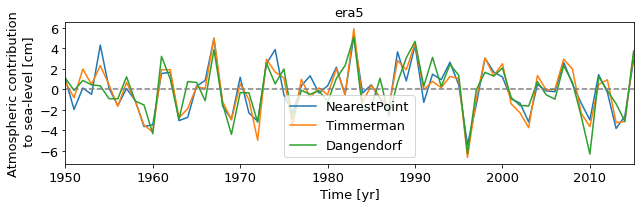

In [4]:
fig.plot_df_timeseries(df_era5, ylabel = 'Atmospheric contribution\n to sea-level [cm]', title = 'era5')
plt.xlim(1950,2015)


(1950.0, 2015.0)

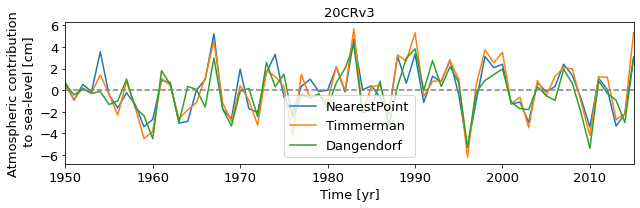

In [5]:
fig.plot_df_timeseries(df_20cr, ylabel = 'Atmospheric contribution\n to sea-level [cm]', title = '20CRv3')
plt.xlim(1950,2015)



(1950.0, 2015.0)

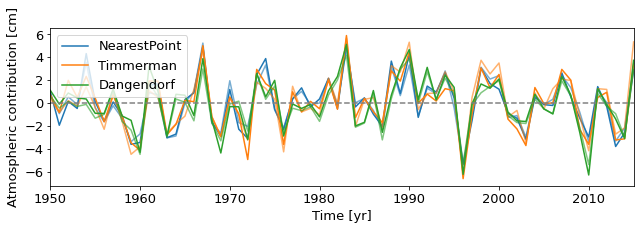

In [6]:
fig.plot_era5_20cr_timeseries(df_era5, df_20cr)
plt.xlim(1950,2015)

### Import and plot AMV data

There are three observational SST products: HadiSST, COBE and ERSST
whereof the deseasonalized, detrended data is imported

In [7]:
AMV_data = imprt.import_obs_AMV_data()

# Select period 1950 - 2015
AMV_data = AMV_data.loc[1950:2015]

(1950.0, 2015.0)

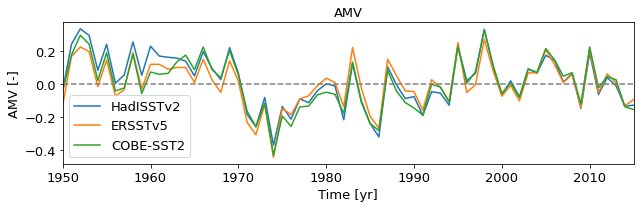

In [8]:
fig.plot_df_timeseries(AMV_data, ylabel = 'AMV [-]', title = 'AMV')
plt.xlim(1950,2015)



### Perform regression for 31y window


A lagged regression is performed between each AMV time series and each atmospheric contribution to sea-level time series for the data where a lowess smoothing is applied to with a 31 y window

In [9]:
df_era5_31, df_20cr_31 = imprt.import_obs_ac_slh_data(smoothed = True, window = 31)
AMV_data_31 = imprt.import_obs_AMV_data(smoothed = True, window = 31)

# Select period 1950 - 2015
df_era5_31 = df_era5_31.loc[1950:2015]
df_20cr_31 = df_20cr_31.loc[1950:2015]
AMV_data_31 = AMV_data_31.loc[1950:2015]

#### Plot regression input

(1950.0, 2015.0)

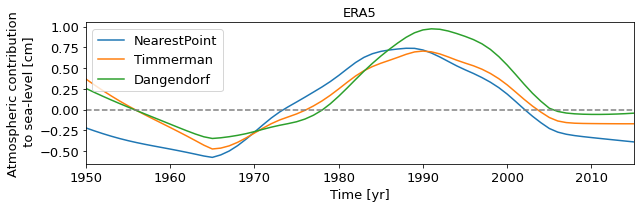

In [10]:
fig.plot_df_timeseries(df_era5_31, ylabel = 'Atmospheric contribution\n to sea-level [cm]', title = 'ERA5', window = 31)
plt.xlim(1950,2015)


(1950.0, 2015.0)

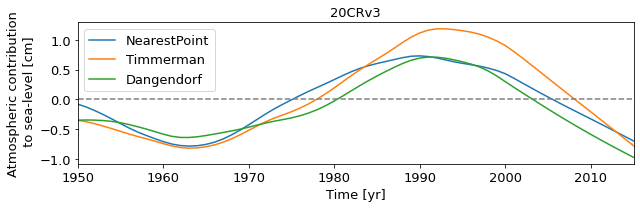

In [11]:
fig.plot_df_timeseries(df_20cr_31, ylabel = 'Atmospheric contribution\n to sea-level [cm]', title = '20CRv3', window = 31)
plt.xlim(1950,2015)



(1950.0, 2015.0)

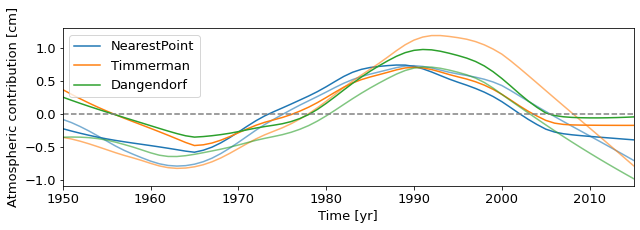

In [12]:
fig.plot_era5_20cr_timeseries(df_era5_31, df_20cr_31, window = 31)
plt.xlim(1950,2015)

(1950.0, 2015.0)

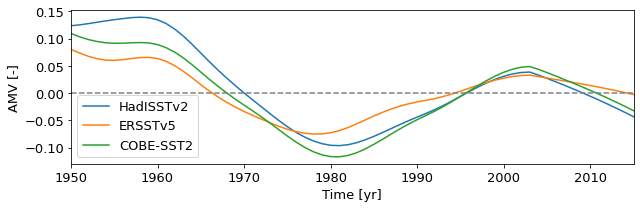

In [13]:
fig.plot_df_timeseries(AMV_data_31, ylabel = 'AMV [-]', title = '', window = 31)
plt.xlim(1950,2015)



#### Perform regression

In [14]:
results_era5_31, timeseries_era5_31 = regr.lagged_regression(AMV_data_31, df_era5_31)
results_20cr_31, timeseries_20cr_31 = regr.lagged_regression(AMV_data_31, df_20cr_31)

In [15]:
results_era5_31.swaplevel(0,2, axis=1)[0]

,NearestPoint,Timmerman,Dangendorf,NearestPoint,Timmerman,Dangendorf,NearestPoint,Timmerman,Dangendorf
,HadISSTv2,HadISSTv2,HadISSTv2,ERSSTv5,ERSSTv5,ERSSTv5,COBE-SST2,COBE-SST2,COBE-SST2
result,,,,,,,,,
rmse,0.309397,0.320410,0.388757,0.356322,0.341776,0.412627,0.315500,0.325996,0.399349
r$^2$,0.493010,0.157445,0.123882,0.327562,0.041334,0.012989,0.472810,0.127814,0.075490
constant,-0.002766,0.093353,0.178616,-0.002766,0.093353,0.178616,-0.002766,0.093353,0.178616
coef,-0.305101,-0.138507,-0.146185,-0.248693,-0.070967,-0.047336,-0.298786,-0.124795,-0.114115


In [16]:
results_20cr_31.swaplevel(0,2, axis=1)[0]

,NearestPoint,Timmerman,Dangendorf,NearestPoint,Timmerman,Dangendorf,NearestPoint,Timmerman,Dangendorf
,HadISSTv2,HadISSTv2,HadISSTv2,ERSSTv5,ERSSTv5,ERSSTv5,COBE-SST2,COBE-SST2,COBE-SST2
result,,,,,,,,,
rmse,0.403011,0.595683,0.433099,0.456680,0.659685,0.458922,0.426031,0.631988,0.442517
r$^2$,0.356304,0.239991,0.172381,0.173446,0.067900,0.070745,0.280669,0.144527,0.135995
constant,-0.028045,0.054691,-0.143850,-0.028045,0.054691,-0.143850,-0.028045,0.054691,-0.143850
coef,-0.299838,-0.334736,-0.197659,-0.209199,-0.178049,-0.126625,-0.266118,-0.259764,-0.175563


In [17]:
results_20cr_31['COBE-SST2', 'Timmerman'][[5,6,7,8,9,10,11,12,13,14,15]]

,5,6,7,8,9,10,11,12,13,14,15
result,,,,,,,,,,,
rmse,0.452129,0.400068,0.344518,0.287048,0.230346,0.180011,0.147819,0.149479,0.184894,0.236453,0.293305
r$^2$,0.578721,0.671057,0.756121,0.830276,0.890114,0.932288,0.953728,0.951814,0.924569,0.873253,0.798967
constant,0.103050,0.113561,0.123976,0.134164,0.144053,0.153771,0.163560,0.173672,0.184416,0.197044,0.212028
coef,-0.511076,-0.546584,-0.575548,-0.597599,-0.612444,-0.619623,-0.618631,-0.609091,-0.590791,-0.563775,-0.528303


#### Show regression results

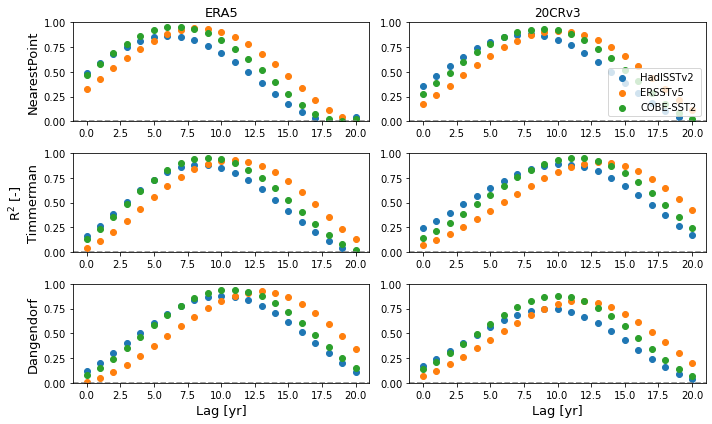

In [18]:
fig.plot_result(results_era5_31, results_20cr_31, 'r$^2$', 'R$^2$ [-]', ymin = 0.0, ymax = 1.0, window = 31)

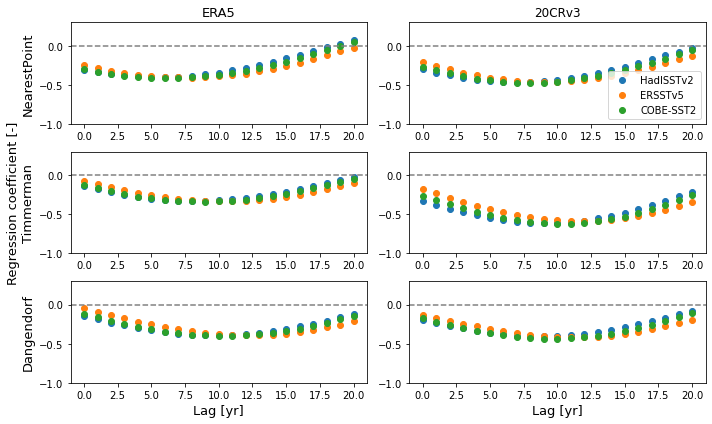

In [19]:
fig.plot_result(results_era5_31, results_20cr_31, 'coef', 'Regression coefficient [-]', ymin = -1, ymax = 0.3, window = 31)

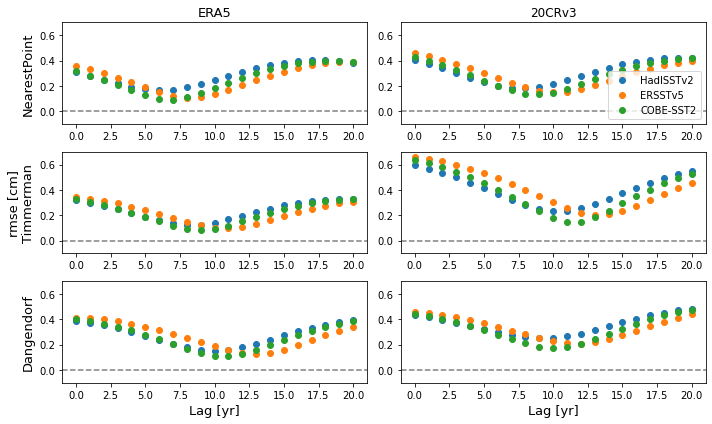

In [20]:
fig.plot_result(results_era5_31, results_20cr_31, 'rmse', 'rmse [cm]', ymin = -0.1, ymax = 0.7, window = 31)

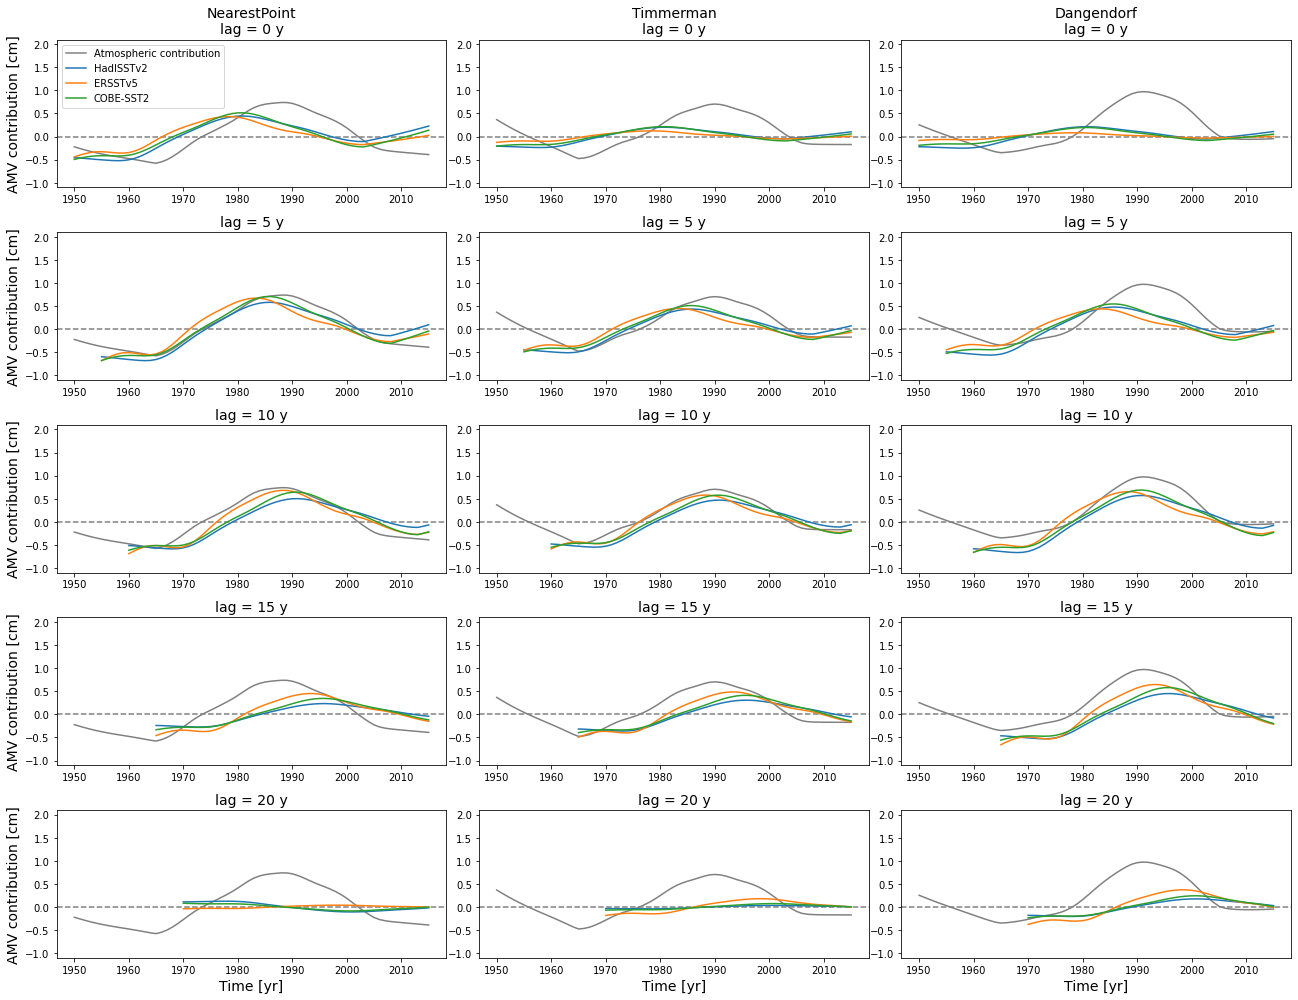

In [21]:
fig.plot_timeseries(timeseries_era5_31, df_era5_31, [0, 5, 10, 15, 20], data_type='era5', window = 31)

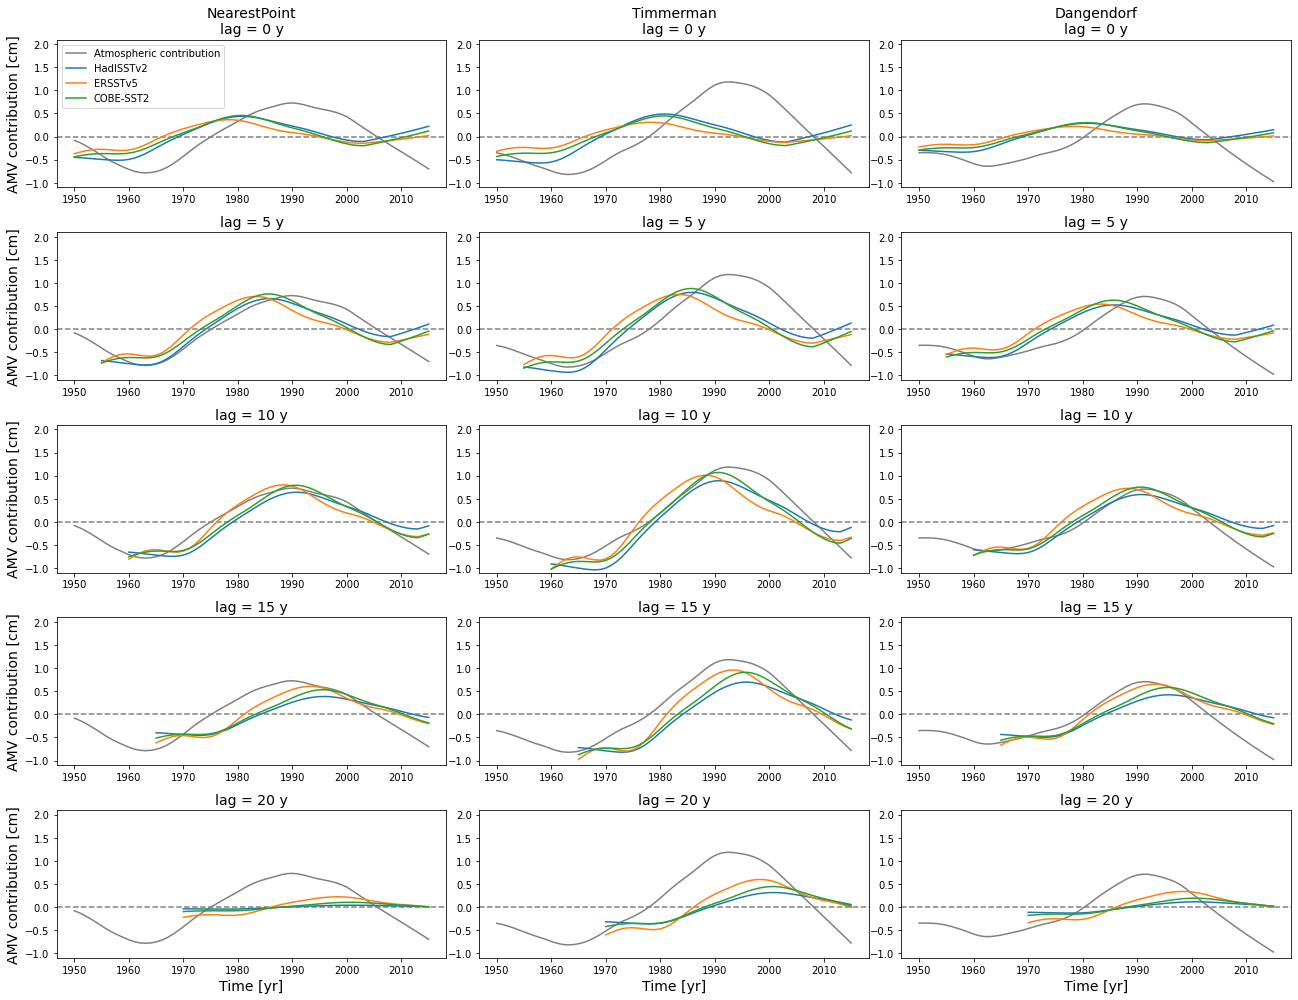

In [22]:
fig.plot_timeseries(timeseries_20cr_31, df_20cr_31, [0, 5, 10, 15, 20], data_type='20cr', window = 31)

#### Create barplot of preferred lags

In [23]:
import pandas as pd
rm_names = ['NearestPoint', 'Timmerman', 'Dangendorf']
amv_names = ['HadISSTv2', 'ERSSTv5', 'COBE-SST2']

lag_df = pd.DataFrame({'lag':['lag']})
lag_df = lag_df.set_index('lag')


dfs = []
for rm_name in rm_names:
    lag_df_era5 = lag_df.copy()
    for amv_name in amv_names:
        lag_df_era5[amv_name] = results_era5_31[amv_name, rm_name].T.idxmax()['r$^2$']
    
    dfs.append(lag_df_era5)
lag_df_era5 = pd.concat(dfs, axis =1, keys = rm_names)

dfs = []
for rm_name in rm_names:
    lag_df_20cr= lag_df.copy()
    for amv_name in amv_names:
        lag_df_20cr[amv_name] = results_20cr_31[amv_name, rm_name].T.idxmax()['r$^2$']
    
    dfs.append(lag_df_20cr)

lag_df_20cr = pd.concat(dfs, axis =1, keys = rm_names)
        
lag_df = pd.concat([lag_df_era5, lag_df_20cr], axis=1, keys = ['ERA5', '20CRv3'])

In [24]:
lag_df.T

lag                            lag
ERA5   NearestPoint HadISSTv2    6
                    ERSSTv5      8
                    COBE-SST2    7
       Timmerman    HadISSTv2    8
                    ERSSTv5     11
                    COBE-SST2    9
       Dangendorf   HadISSTv2   10
                    ERSSTv5     13
                    COBE-SST2   11
20CRv3 NearestPoint HadISSTv2    8
                    ERSSTv5     10
                    COBE-SST2    9
       Timmerman    HadISSTv2   10
                    ERSSTv5     13
                    COBE-SST2   11
       Dangendorf   HadISSTv2    9
                    ERSSTv5     12
                    COBE-SST2   10

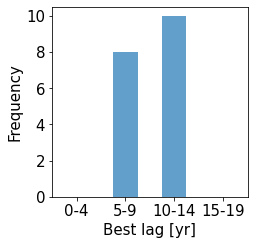

In [25]:
freq_df = pd.DataFrame({'lag':['0-4', '5-9', '10-14', '15-19'], 'frequency':[0,8,10,0]})
freq_df = freq_df.set_index('lag')

freq_df.plot.bar(legend = False, rot = 0, alpha = 0.7, figsize = (3.5,3.5))
plt.xlabel('Best lag [yr]', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.xticks(size = 15)
plt.yticks(size = 15)
#plt.ylim(0, 3.5)

plt.savefig(f'/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Figures/AMV/1950_2015/barplot', 
                bbox_inches = 'tight', dpi = 500)